In [ ]:
Problématique : Peut-on mesurer la popularité de certains decks, des classes de héros en parties classées sur une période donnée ? 
De certaines certaines cartes ? 
De certains archétypes de decks ? 

In [6]:
#Import librairies
import json, datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print('libs loaded')


# Import datasets
# with open('datas/data/data.json') as file:
#     data = json.load(file)
    
decks = pd.read_csv('datas/data.csv');


print('decks loaded')



libs loaded
decks loaded


In [37]:
# convert into dataframe
# decks = pd.DataFrame(data)
decks
#data


,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,9740,2016-02-19,Unknown,Priest,W,433004,Explorers,Tavern Brawl,1,Reno Priest,...,2336,2457,2511,2555,2566,2582,2683,2736,2848,2883
1,9840,2016-02-19,Unknown,Warrior,W,433003,Explorers,Ranked Deck,1,RoosterWarrior,...,1781,1781,2021,2021,2064,2064,2078,2510,2729,2736
2,2600,2016-02-19,Unknown,Mage,W,433002,Explorers,Theorycraft,1,Annoying,...,1793,1801,1801,2037,2037,2064,2064,2078,38710,38710
3,15600,2016-02-19,Unknown,Warrior,W,433001,Explorers,None,0,Standart pay to win warrior,...,1657,1721,2018,2296,2320,2328,2729,2729,2736,2760
4,7700,2016-02-19,Unknown,Paladin,W,432997,Explorers,Ranked Deck,1,Palamix,...,2027,2029,2029,2064,2078,2336,2717,2717,2889,2889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346237,5480,2016-04-25,Unknown,Paladin,S,495042,Classic Nerfs,None,3,Shields Up! [Old Gods Deck Recipe],...,2918,2918,38740,38740,38745,38745,38781,38781,38911,38911
346238,3840,2016-02-07,Unknown,Rogue,S,427586,Explorers,None,1,Post Standard Miracle Rogue,...,1029,1029,1117,1117,1158,1158,1372,1651,2884,2884
346239,5580,2016-02-07,Unknown,Paladin,W,427574,Explorers,Ranked Deck,0,Genoocide's Reno Paladin,...,2029,2037,2078,2655,2704,2883,2889,2901,2949,2951
346240,5160,2016-02-07,Unknown,Druid,S,427571,Explorers,Ranked Deck,1,standard combo,...,1124,1124,2336,2780,2780,2782,2782,2948,38319,38319


In [38]:
#Visualition des données du dataset
decks.describe()

,craft_cost,deck_id,rating,card_0,card_1,card_2,card_3,card_4,card_5,card_6,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
count,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,...,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000,346242.000000
mean,5645.225937,394142.273066,2.687170,165.618195,214.709798,320.650366,382.358134,469.886496,536.562907,628.203574,...,6662.273043,7860.112638,9278.601605,10738.678049,12351.647556,13647.057645,15014.507203,15903.576591,19204.390579,20435.190924
std,3928.009144,222610.838932,22.117435,514.386878,547.597644,600.603571,625.753189,709.402370,800.371897,976.070998,...,12541.153259,13685.215076,14820.057280,15796.431017,16668.158774,17234.816728,17718.344378,17972.907339,18532.443825,18620.628679
min,0.000000,18.000000,0.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
25%,2720.000000,216700.750000,1.000000,64.000000,75.000000,189.000000,237.000000,282.000000,315.000000,405.000000,...,1182.000000,1626.000000,1667.000000,1784.000000,1805.000000,1914.000000,2026.000000,2064.000000,2093.000000,2320.000000
50%,5000.000000,406037.500000,1.000000,138.000000,180.000000,285.000000,315.000000,420.000000,476.000000,581.000000,...,2006.000000,2037.000000,2064.000000,2078.000000,2291.000000,2490.000000,2579.000000,2655.000000,2898.000000,3015.000000
75%,7740.000000,590813.750000,1.000000,238.000000,285.000000,420.000000,476.000000,605.000000,648.000000,763.000000,...,2610.000000,2736.000000,2890.000000,2951.000000,38336.000000,38505.000000,38727.000000,38797.000000,38918.000000,39026.000000
max,48000.000000,749548.000000,4016.000000,41409.000000,41409.000000,41409.000000,41409.000000,41409.000000,41409.000000,41409.000000,...,41409.000000,41409.000000,41409.000000,41566.000000,42646.000000,42646.000000,42646.000000,42646.000000,42646.000000,42646.000000


In [39]:
decks.dtypes

craft_cost                 int64
date              datetime64[ns]
deck_archetype            object
deck_class                object
deck_format               object
deck_id                    int64
deck_set                  object
deck_type                 object
rating                     int64
title                     object
user                      object
card_0                     int64
card_1                     int64
card_2                     int64
card_3                     int64
card_4                     int64
card_5                     int64
card_6                     int64
card_7                     int64
card_8                     int64
card_9                     int64
card_10                    int64
card_11                    int64
card_12                    int64
card_13                    int64
card_14                    int64
card_15                    int64
card_16                    int64
card_17                    int64
card_18                    int64
card_19   

In [40]:
decks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346242 entries, 0 to 346241
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   craft_cost      346242 non-null  int64         
 1   date            346242 non-null  datetime64[ns]
 2   deck_archetype  346242 non-null  object        
 3   deck_class      346242 non-null  object        
 4   deck_format     346242 non-null  object        
 5   deck_id         346242 non-null  int64         
 6   deck_set        346242 non-null  object        
 7   deck_type       346242 non-null  object        
 8   rating          346242 non-null  int64         
 9   title           346234 non-null  object        
 10  user            346242 non-null  object        
 11  card_0          346242 non-null  int64         
 12  card_1          346242 non-null  int64         
 13  card_2          346242 non-null  int64         
 14  card_3          346242 non-null  int

In [41]:
#convertir object date en date
from datetime import datetime
print ('datetime import')

datetime import


In [42]:
decks['date'] = pd.to_datetime(decks['date'])
decks['date']

0        2016-02-19
1        2016-02-19
2        2016-02-19
3        2016-02-19
4        2016-02-19
            ...    
346237   2016-04-25
346238   2016-02-07
346239   2016-02-07
346240   2016-02-07
346241   2016-02-07
Name: date, Length: 346242, dtype: datetime64[ns]

In [43]:
decks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346242 entries, 0 to 346241
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   craft_cost      346242 non-null  int64         
 1   date            346242 non-null  datetime64[ns]
 2   deck_archetype  346242 non-null  object        
 3   deck_class      346242 non-null  object        
 4   deck_format     346242 non-null  object        
 5   deck_id         346242 non-null  int64         
 6   deck_set        346242 non-null  object        
 7   deck_type       346242 non-null  object        
 8   rating          346242 non-null  int64         
 9   title           346234 non-null  object        
 10  user            346242 non-null  object        
 11  card_0          346242 non-null  int64         
 12  card_1          346242 non-null  int64         
 13  card_2          346242 non-null  int64         
 14  card_3          346242 non-null  int

In [44]:
decks


,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,9740,2016-02-19,Unknown,Priest,W,433004,Explorers,Tavern Brawl,1,Reno Priest,...,2336,2457,2511,2555,2566,2582,2683,2736,2848,2883
1,9840,2016-02-19,Unknown,Warrior,W,433003,Explorers,Ranked Deck,1,RoosterWarrior,...,1781,1781,2021,2021,2064,2064,2078,2510,2729,2736
2,2600,2016-02-19,Unknown,Mage,W,433002,Explorers,Theorycraft,1,Annoying,...,1793,1801,1801,2037,2037,2064,2064,2078,38710,38710
3,15600,2016-02-19,Unknown,Warrior,W,433001,Explorers,None,0,Standart pay to win warrior,...,1657,1721,2018,2296,2320,2328,2729,2729,2736,2760
4,7700,2016-02-19,Unknown,Paladin,W,432997,Explorers,Ranked Deck,1,Palamix,...,2027,2029,2029,2064,2078,2336,2717,2717,2889,2889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346237,5480,2016-04-25,Unknown,Paladin,S,495042,Classic Nerfs,None,3,Shields Up! [Old Gods Deck Recipe],...,2918,2918,38740,38740,38745,38745,38781,38781,38911,38911
346238,3840,2016-02-07,Unknown,Rogue,S,427586,Explorers,None,1,Post Standard Miracle Rogue,...,1029,1029,1117,1117,1158,1158,1372,1651,2884,2884
346239,5580,2016-02-07,Unknown,Paladin,W,427574,Explorers,Ranked Deck,0,Genoocide's Reno Paladin,...,2029,2037,2078,2655,2704,2883,2889,2901,2949,2951
346240,5160,2016-02-07,Unknown,Druid,S,427571,Explorers,Ranked Deck,1,standard combo,...,1124,1124,2336,2780,2780,2782,2782,2948,38319,38319


In [45]:
###Combien de decks utilisés ? Sur combien de temps ?
raw_length = len(decks)
max_date = decks['date'].max()
min_date = decks['date'].min()
print(raw_length, 'decks joués entre le', min_date, 'et le', max_date)


346242 decks joués entre le 2013-05-23 00:00:00 et le 2017-03-19 00:00:00


In [46]:
#Type decks
decks['deck_type'].value_counts()

Ranked Deck      202375
None              91058
Theorycraft       19688
Arena             14105
PvE Adventure      9059
Tavern Brawl       6360
Tournament         3597
Name: deck_type, dtype: int64

In [47]:
#S'agit il de decks uniques ? Si non, rm doublons 
len(decks['deck_id'].unique())

346242

In [48]:
#Archetype decks
decks['deck_archetype'].value_counts()

Unknown            242634
Midrange Shaman      5472
Control Priest       5136
Control Warrior      4939
Tempo Mage           4546
                    ...  
Oil Rogue             113
Mech Shaman            62
Edit                   51
Mech Rogue             33
Water Rogue            25
Name: deck_archetype, Length: 76, dtype: int64

In [49]:
##Moyenne coût de crafts du deck 
decks.craft_cost.mean()


5645.225937350177

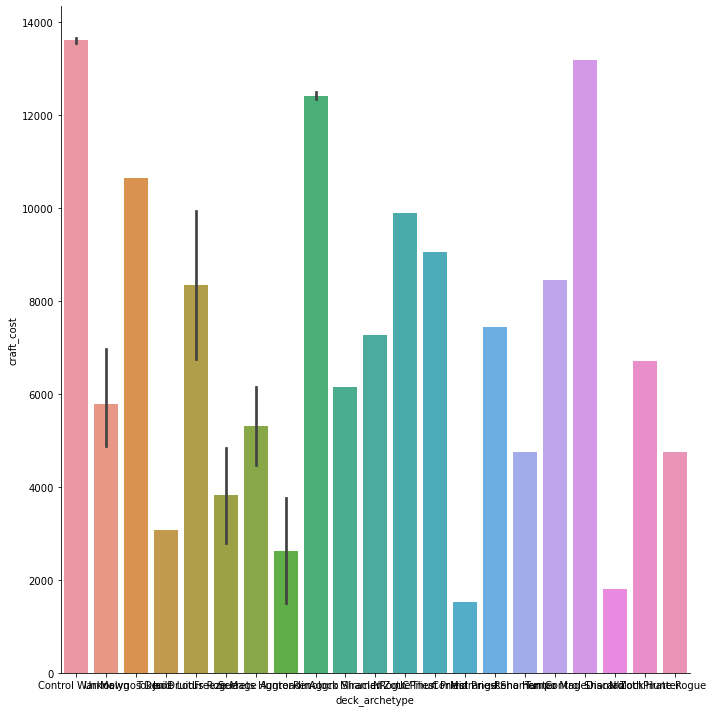

In [50]:
##Relation entre coût du deck pour le joueur et son archétype
sns.catplot(x="deck_archetype", y="craft_cost", data= decks.sample(100), kind="bar", height=10)

In [51]:
##Trop de données, on prend un échantillon plus petit
new_df = decks.sample(n=50)

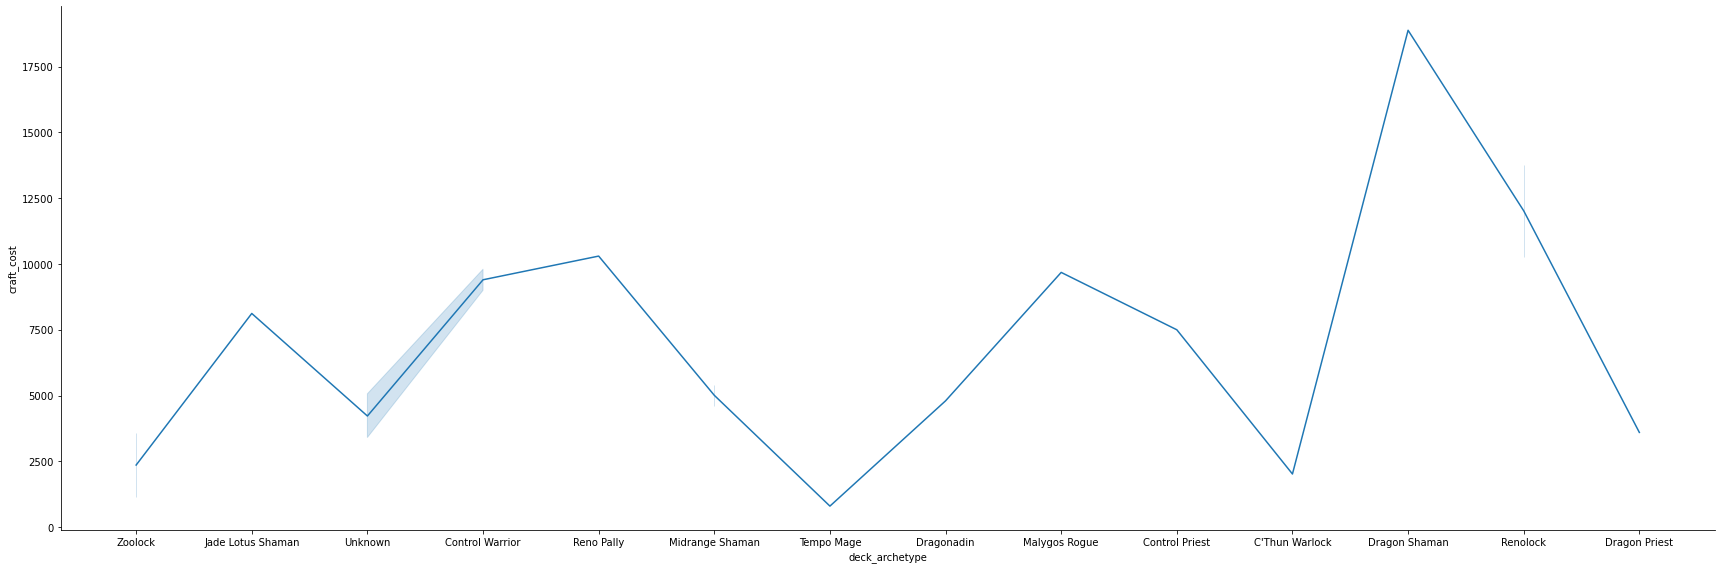

In [52]:
# sns.relplot(x="deck_archetype", y="craft_cost", data= new_df, kind="bar", height=10)
sns.relplot(x="deck_archetype", y="craft_cost", data = new_df, kind="line", height=8, aspect=3)


In [ ]:
##CCL graphique: les decks type contrôle (plus lents) sont plus chers pour le joueur que les decks plus aggressifs

In [53]:
decks.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346242 entries, 0 to 346241
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   craft_cost      346242 non-null  int64         
 1   date            346242 non-null  datetime64[ns]
 2   deck_archetype  346242 non-null  object        
 3   deck_class      346242 non-null  object        
 4   deck_format     346242 non-null  object        
 5   deck_id         346242 non-null  int64         
 6   deck_set        346242 non-null  object        
 7   deck_type       346242 non-null  object        
 8   rating          346242 non-null  int64         
 9   title           346234 non-null  object        
 10  user            346242 non-null  object        
 11  card_0          346242 non-null  int64         
 12  card_1          346242 non-null  int64         
 13  card_2          346242 non-null  int64         
 14  card_3          346242 non-null  int

In [54]:
#Format du deck S = standard, W = wild
decks['deck_format'].value_counts()

W    175448
S    170794
Name: deck_format, dtype: int64

In [55]:
##Reformatage colonne deck format 
decks.deck_format = decks.deck_format.replace(to_replace = ["W", "S"], value=["Wild","Standard"])
decks['deck_format'].value_counts()

Wild        175448
Standard    170794
Name: deck_format, dtype: int64

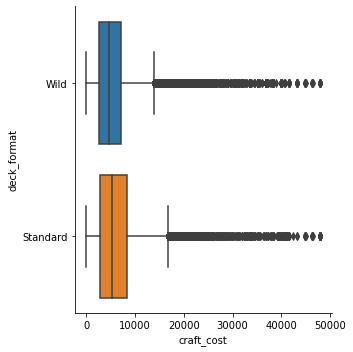

In [56]:
##Relation entre coût du deck pour le joueur et le format du deck
sns.catplot(x='craft_cost', y='deck_format', data=decks, kind='box')


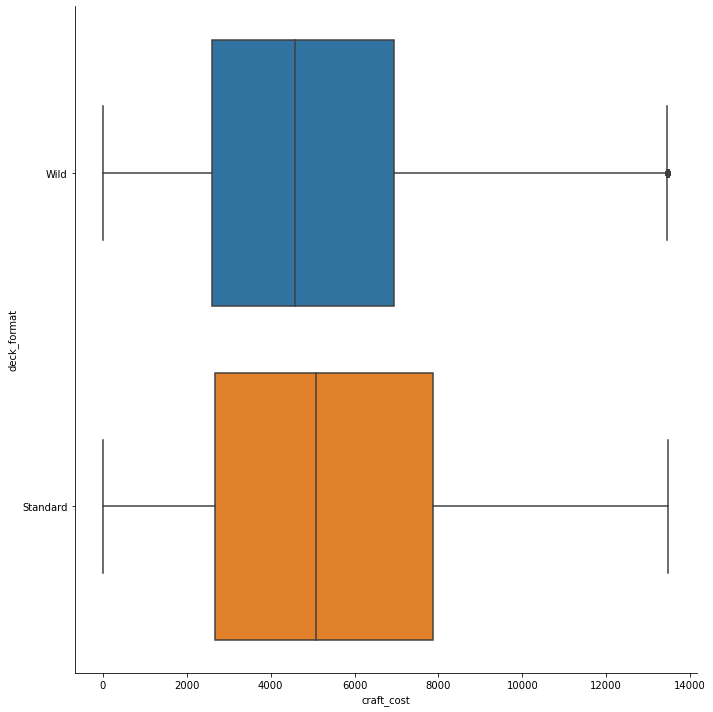

In [57]:
##Too much données abherrantes, on filtre sur la quantité de coût du deck < 13500
craft_cost_moins_abherrants = decks[ decks['craft_cost'] < 13500 ] 
sns.catplot(x="craft_cost", y="deck_format", data = craft_cost_moins_abherrants, kind= "box", height=10)

In [ ]:
##En moyenne, la majorité des decks standards est un peu plus chère que les decks wilds

In [58]:
decks_wild = decks[ decks.deck_format == 'Wild' ] 
decks_wild['craft_cost'].mean()


5280.296270119921

In [59]:
decks_std = decks[ decks.deck_format == 'Standard' ] 
decks_std['craft_cost'].mean()

6020.0996463576

In [60]:
#Total decks par classe 
decks.deck_class.value_counts()

Mage       45306
Priest     44307
Paladin    42268
Warlock    38025
Druid      37892
Shaman     36457
Warrior    35945
Rogue      34794
Hunter     31248
Name: deck_class, dtype: int64

In [61]:
decks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346242 entries, 0 to 346241
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   craft_cost      346242 non-null  int64         
 1   date            346242 non-null  datetime64[ns]
 2   deck_archetype  346242 non-null  object        
 3   deck_class      346242 non-null  object        
 4   deck_format     346242 non-null  object        
 5   deck_id         346242 non-null  int64         
 6   deck_set        346242 non-null  object        
 7   deck_type       346242 non-null  object        
 8   rating          346242 non-null  int64         
 9   title           346234 non-null  object        
 10  user            346242 non-null  object        
 11  card_0          346242 non-null  int64         
 12  card_1          346242 non-null  int64         
 13  card_2          346242 non-null  int64         
 14  card_3          346242 non-null  int

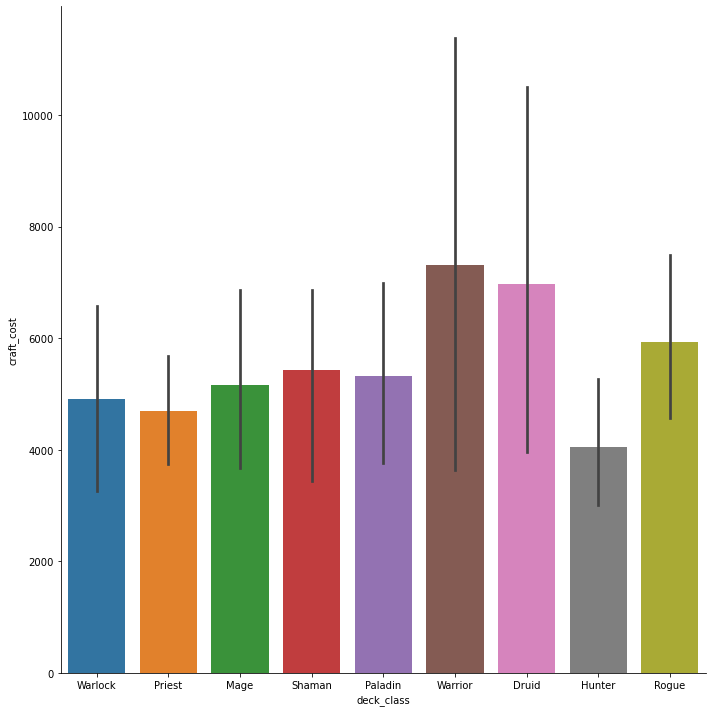

In [63]:
##Relation entre coût du deck pour le joueur et la classe héros choisie
sns.catplot(x="deck_class", y="craft_cost", data= decks.sample(100), kind="bar", height=10)

In [64]:
decks.deck_set.value_counts()

Explorers           57307
Old Gods            49895
Blackrock Launch    38900
Gadgetzan           31329
Naxx Launch         22283
Yogg Nerf           22175
Karazhan            22034
TGT Launch          21516
GvG Launch          14556
Undertaker Nerf     11296
Beta Patch 3937      8561
Live Patch 5506      6924
Warsong Nerf         6867
Aggro Downfall       5490
Beta Patch 4482      4490
Beta Patch 3664      3705
Classic Nerfs        3472
Live Patch 5170      3138
Live Patch 4973      2629
Beta Patch 4243      1800
Live Patch 5314      1728
GvG Prelaunch        1574
Beta Patch 3749      1364
Live Patch 5435       820
Beta Patch 3388       563
Beta Patch 4217       515
Beta Release          491
Beta Patch 3890       459
Beta Patch 4944       247
Beta Patch 4458        60
Beta Patch 3645        32
Beta Patch 3604        22
Name: deck_set, dtype: int64

In [65]:
decks_explorers = decks[ decks.deck_set == 'Explorers' ] 
classe_héros = decks_explorers['deck_class'].value_counts()
classe_héros

Mage       8383
Paladin    7507
Priest     7129
Warlock    6272
Rogue      5859
Druid      5835
Warrior    5818
Shaman     5538
Hunter     4966
Name: deck_class, dtype: int64

In [66]:
decks_kara = decks[ decks.deck_set == 'Karazhan' ] 
classe_héros_kara = decks_kara['deck_class'].value_counts()
classe_héros_kara

Priest     3154
Mage       2774
Paladin    2582
Warrior    2492
Hunter     2428
Druid      2347
Rogue      2223
Shaman     2174
Warlock    1860
Name: deck_class, dtype: int64

In [67]:
decks

,craft_cost,date,deck_archetype,deck_class,deck_format,deck_id,deck_set,deck_type,rating,title,...,card_20,card_21,card_22,card_23,card_24,card_25,card_26,card_27,card_28,card_29
0,9740,2016-02-19,Unknown,Priest,Wild,433004,Explorers,Tavern Brawl,1,Reno Priest,...,2336,2457,2511,2555,2566,2582,2683,2736,2848,2883
1,9840,2016-02-19,Unknown,Warrior,Wild,433003,Explorers,Ranked Deck,1,RoosterWarrior,...,1781,1781,2021,2021,2064,2064,2078,2510,2729,2736
2,2600,2016-02-19,Unknown,Mage,Wild,433002,Explorers,Theorycraft,1,Annoying,...,1793,1801,1801,2037,2037,2064,2064,2078,38710,38710
3,15600,2016-02-19,Unknown,Warrior,Wild,433001,Explorers,None,0,Standart pay to win warrior,...,1657,1721,2018,2296,2320,2328,2729,2729,2736,2760
4,7700,2016-02-19,Unknown,Paladin,Wild,432997,Explorers,Ranked Deck,1,Palamix,...,2027,2029,2029,2064,2078,2336,2717,2717,2889,2889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346237,5480,2016-04-25,Unknown,Paladin,Standard,495042,Classic Nerfs,None,3,Shields Up! [Old Gods Deck Recipe],...,2918,2918,38740,38740,38745,38745,38781,38781,38911,38911
346238,3840,2016-02-07,Unknown,Rogue,Standard,427586,Explorers,None,1,Post Standard Miracle Rogue,...,1029,1029,1117,1117,1158,1158,1372,1651,2884,2884
346239,5580,2016-02-07,Unknown,Paladin,Wild,427574,Explorers,Ranked Deck,0,Genoocide's Reno Paladin,...,2029,2037,2078,2655,2704,2883,2889,2901,2949,2951
346240,5160,2016-02-07,Unknown,Druid,Standard,427571,Explorers,Ranked Deck,1,standard combo,...,1124,1124,2336,2780,2780,2782,2782,2948,38319,38319


In [83]:
avg_rating_by_class = decks.rating.groupby(decks.deck_class).mean()
sns.relplot(x="deck_class", y="avg_rating_by_class", data=avg_rating_by_class)

ValueError: Could not interpret value `avg_rating_by_class` for parameter `y`